In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import allantools as at
import scipy.interpolate
from scipy import stats  
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
save_dir = '/eos/user/e/elsweene/SWAN_projects/Filtered_data_sets/'

In [3]:
Generated_data = pd.read_csv(save_dir + "Q_Fit_Max.csv")

Generated_data

,Fit_max,IM_max,Ld,RW
0,16,19,-5.0,0.1
1,19,22,-4.8,0.1
2,18,21,-4.6,0.1
3,21,21,-4.4,0.1
4,21,23,-4.2,0.1
...,...,...,...,...
1015,14,14,4.2,2.0
1016,14,15,4.4,2.0
1017,14,14,4.6,2.0
1018,14,14,4.8,2.0


In [4]:
len(Generated_data['RW'])

1020

In [5]:
def find_time(RW,LD):
    
    for i in np.arange(0,1020,1): 
                       
            x = round(Generated_data['RW'][i],2)
            #print(i)
            #print(x)
                       
            if x == RW:
                y = round(Generated_data['Ld'][i],2)
                #print(y)
                
                if y == LD :
                    return Generated_data['Fit_max'][i]
                
                elif y !=LD:
                    i+=1
                        
            elif x !=RW:
                i+=1

In [6]:
find_time(1.,1.0)

23

In [7]:
GD_array = np.array(Generated_data)

In [8]:
#GD_array[:,0]

In [9]:
 lnspc = np.linspace(-5, 5,1020)

In [10]:
mu = 0
scale = 1.2

# Generate random numbers from Laplace distribution with the parameters
x = np.arange(-5, 5.1, 0.1)
pdf = stats.laplace.pdf(x, mu, scale)

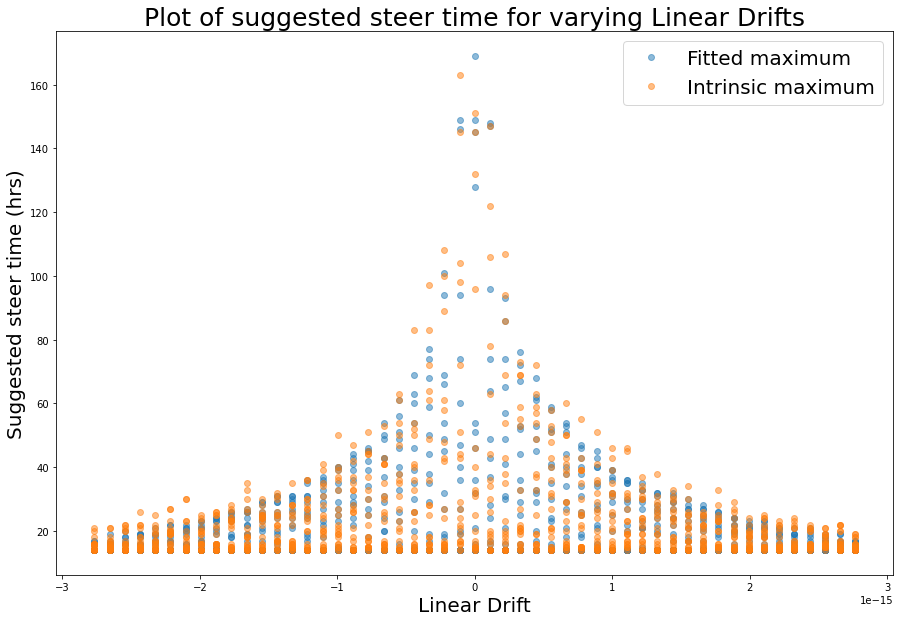

In [11]:
plt.figure(figsize=(15,10))

plt.plot(Generated_data['Ld']*-5.535983752911291e-16,Generated_data['Fit_max'],'o',alpha=0.5,label='Fitted maximum')
plt.plot(Generated_data['Ld']*-5.535983752911291e-16,Generated_data['IM_max'],'o',alpha=0.5,label='Intrinsic maximum')

plt.xlabel('Linear Drift',fontsize=20)
plt.ylabel('Suggested steer time (hrs)',fontsize=20)

plt.title('Plot of suggested steer time for varying Linear Drifts',fontsize=25)

plt.legend(fontsize=20)

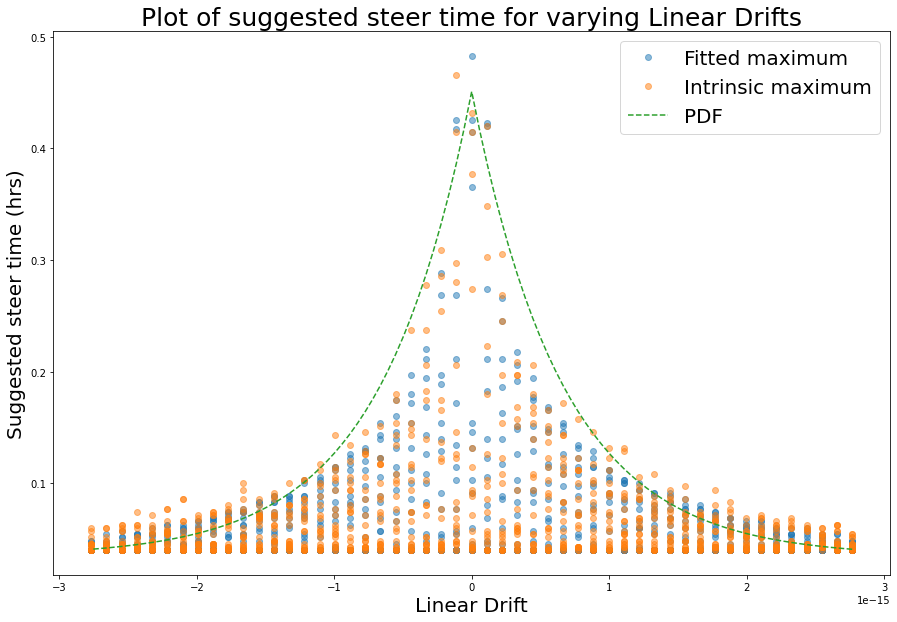

In [12]:
plt.figure(figsize=(15,10))

plt.plot(Generated_data['Ld']*-5.535983752911291e-16,Generated_data['Fit_max']/350,'o',alpha=0.5,label='Fitted maximum')
plt.plot(Generated_data['Ld']*-5.535983752911291e-16,Generated_data['IM_max']/350,'o',alpha=0.5,label='Intrinsic maximum')

plt.xlabel('Linear Drift',fontsize=20)
plt.ylabel('Suggested steer time (hrs)',fontsize=20)

plt.plot(x*-5.535983752911291e-16, pdf+12/350, label='PDF',linestyle='dashed')

plt.title('Plot of suggested steer time for varying Linear Drifts',fontsize=25)

plt.legend(fontsize=20)

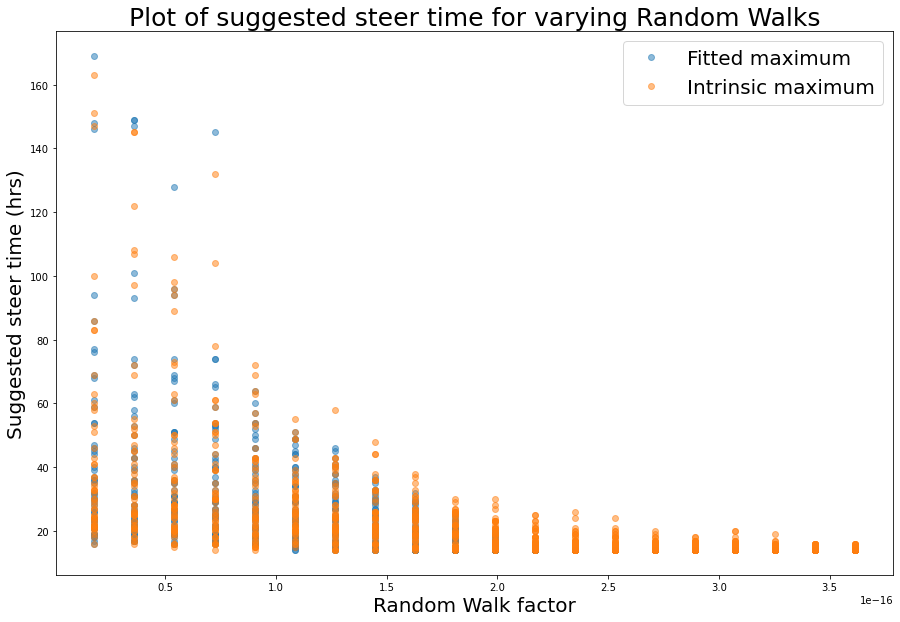

In [13]:
plt.figure(figsize=(15,10))

plt.plot(Generated_data['RW']*1.8078259919953017e-16,Generated_data['Fit_max'],'o',alpha=0.5,label='Fitted maximum')
plt.plot(Generated_data['RW']*1.8078259919953017e-16,Generated_data['IM_max'],'o',alpha=0.5,label='Intrinsic maximum')

plt.xlabel('Random Walk factor',fontsize=20)
plt.ylabel('Suggested steer time (hrs)',fontsize=20)

plt.title('Plot of suggested steer time for varying Random Walks',fontsize=25)

plt.legend(fontsize=20)

# Make Contour Plot

In [14]:
Z = Generated_data.pivot_table(index='Ld', columns='RW', values='Fit_max').T.values

In [15]:
pd.DataFrame(Z)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,16,19,18,21,21,21,23,22,24,26,...,26,24,23,21,22,21,19,18,19,17
1,17,17,18,20,19,21,22,23,24,26,...,24,23,23,22,22,19,19,20,17,17
2,17,19,19,19,19,20,23,21,24,25,...,26,23,22,20,20,19,19,18,16,16
3,17,17,17,18,19,19,21,22,22,24,...,25,24,21,21,19,19,18,17,16,16
4,16,16,17,17,18,19,21,21,22,23,...,24,21,21,20,18,18,18,16,16,16
5,15,15,17,16,17,18,18,20,20,22,...,23,20,18,19,17,17,16,14,15,14
6,14,16,15,15,15,17,19,18,20,21,...,19,19,17,16,17,17,16,16,14,14
7,14,14,15,15,16,16,16,17,19,19,...,18,15,17,16,16,16,14,14,14,14
8,14,14,14,14,14,14,15,15,16,18,...,18,16,16,15,14,14,14,14,14,14
9,14,14,14,14,14,14,14,14,14,15,...,14,14,15,14,14,14,14,14,14,14


In [16]:
Y_unique = np.sort(Generated_data.RW.unique())
X_unique = np.sort(Generated_data.Ld.unique())

In [17]:
X,Y= np.meshgrid(X_unique, Y_unique)

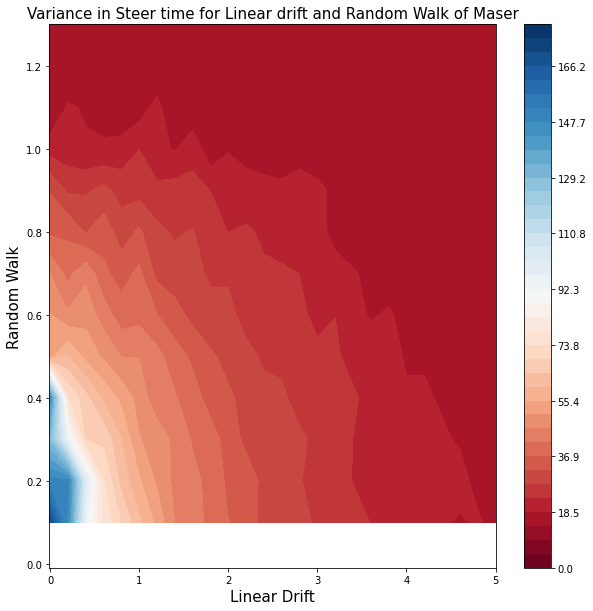

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

levels = np.linspace(0, 180,40)


mycmap1 = plt.get_cmap('RdBu')
cf = ax.contourf(X, Y, Z,levels, cmap=mycmap1)

line_colors = ['black' for l in cf.levels]


#cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
#ax.clabel(cp, fontsize=10, colors=line_colors)


ax.set_title('Variance in Steer time for Linear drift and Random Walk of Maser',fontsize=15)
ax.set_xlabel('Linear Drift',fontsize=15)
ax.set_ylabel('Random Walk',fontsize=15)

ax.set_xlim(-0.01,5)
ax.set_ylim(-0.01,1.3)

fig.colorbar(cf, ax=ax)
plt.show()

Text(0.5, 0, 'Random Walk')

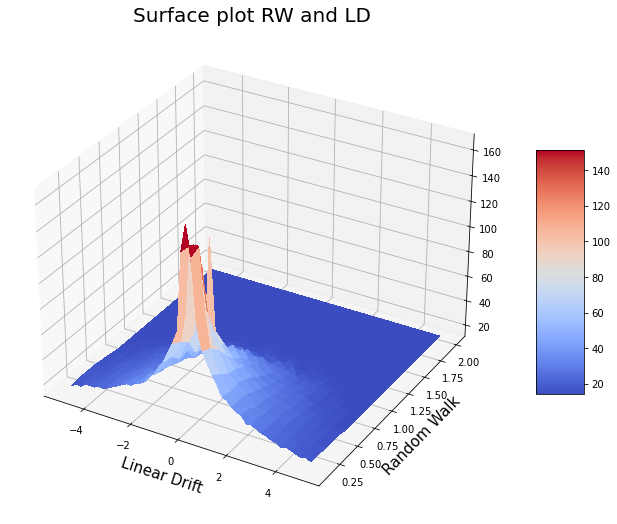

In [19]:
fig = plt.figure(figsize =(14, 9))

my_cmap = plt.get_cmap('coolwarm')

axe = plt.axes(projection ='3d')
surf = axe.plot_surface(X, Y, Z,cmap=my_cmap, linewidth=0, antialiased=False)

fig.colorbar(surf, ax = axe,
             shrink = 0.5, aspect = 5)
 
axe.set_title('Surface plot RW and LD',fontsize=20)
axe.set_xlabel('Linear Drift',fontsize=15)
axe.set_ylabel('Random Walk',fontsize=15)

# Plot Cross Sections

In [20]:
def find_cross_section(constant,varied,constant_value,data):
    
    cross_section_x = []
    cross_section_y = []
    cross_section_z = []
    
    for i in np.arange(0,1020,1): 
                       
            x = round(data[constant][i],2)
            #print(i)
            #print(x)
                       
            if x == constant_value:
                y = data[varied][i]
                #print(y)
                z = data['Fit_max'][i]
                
                cross_section_x.append(x)
                cross_section_y.append(y)
                cross_section_z.append(z)
                
            elif x != constant_value:
                i+=1
                
    return cross_section_x,cross_section_y,cross_section_z

In [21]:
#find_cross_section('RW','Rescaled_LD',1,Generated_data2)

In [22]:
RW_1, LD_for_RW_1, Fit_Max_RW_1 = find_cross_section('RW','Ld',1,Generated_data)

Text(0, 0.5, 'Suggested Steer time (hrs)')

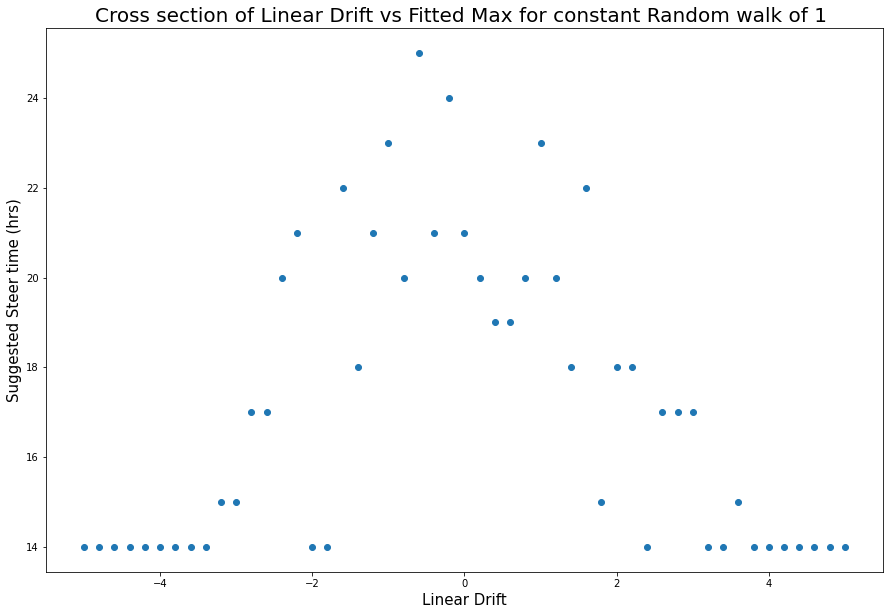

In [23]:
plt.figure(figsize=(15,10))

plt.plot(LD_for_RW_1,Fit_Max_RW_1,'o')

plt.title('Cross section of Linear Drift vs Fitted Max for constant Random walk of 1 ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

In [24]:
LD_1, RW_for_LD_1, Fit_Max_LD_1 = find_cross_section('Ld','RW',1,Generated_data)

Text(0, 0.5, 'Suggested Steer time (hrs)')

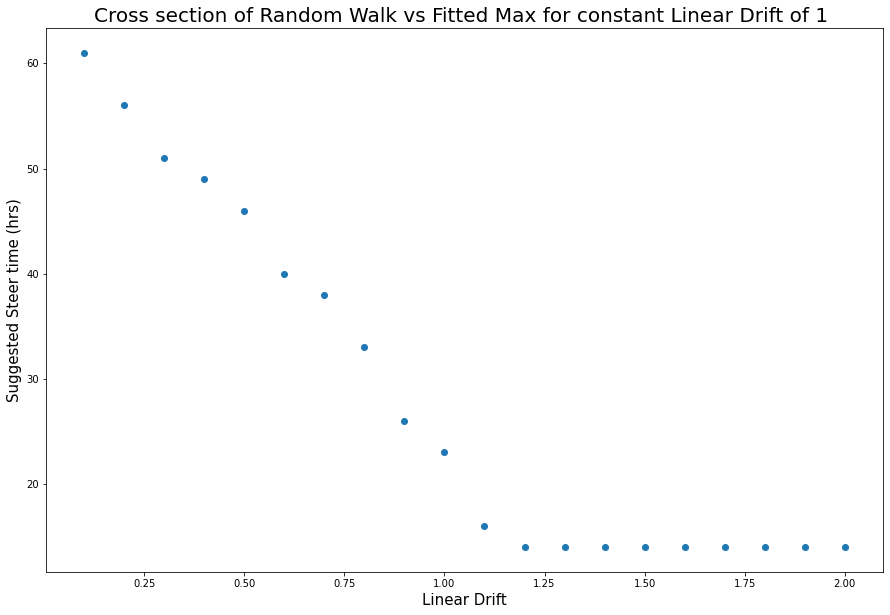

In [25]:
plt.figure(figsize=(15,10))

plt.plot(RW_for_LD_1,Fit_Max_LD_1,'o')

plt.title('Cross section of Random Walk vs Fitted Max for constant Linear Drift of 1 ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

In [26]:
LD_0, RW_for_LD_0, Fit_Max_LD_0 = find_cross_section('Ld','RW',0,Generated_data)

Text(0, 0.5, 'Suggested Steer time (hrs)')

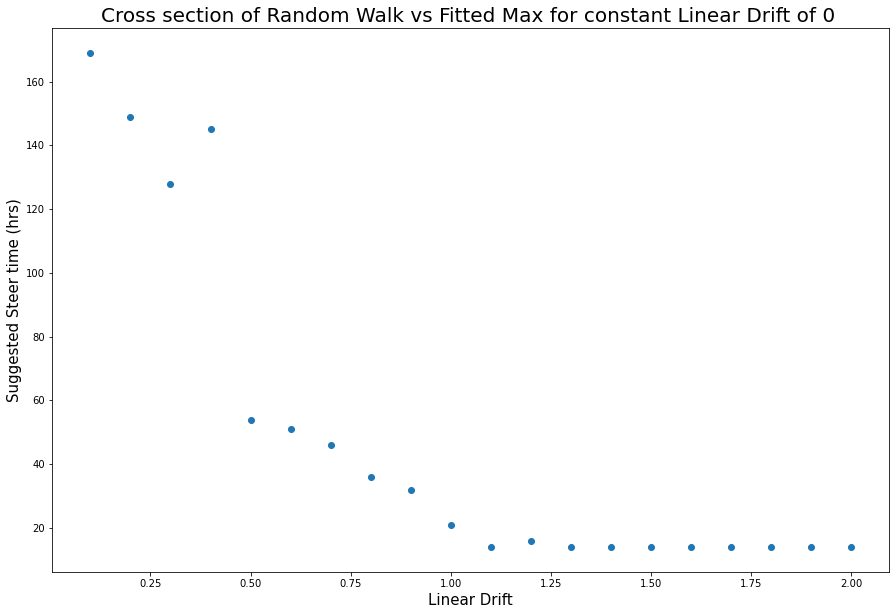

In [27]:
plt.figure(figsize=(15,10))

plt.plot(RW_for_LD_0,Fit_Max_LD_0,'o')

plt.title('Cross section of Random Walk vs Fitted Max for constant Linear Drift of 0 ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

In [28]:
def find_cross_section1(constant,varied,data):
    
    cross_section_x = []
    
    cross_section_y = []
    cross_section_z = []
    
    for i in np.arange(0,1020,1): 
                       
            x = round(data[constant][i],2)
            #print(i)
            #print(x)
            y = round(data[varied][i],2)
                       
            if (x) == (y):
                #print(y)
                z = data['Fit_max'][i]
                
                cross_section_x.append(x)
                cross_section_y.append(y)
                cross_section_z.append(z)
                
            elif x != (y):
                i+=1
                
    return cross_section_x,cross_section_y,cross_section_z

In [29]:
LD_equal, RW_equal, Fit_Max_equal = find_cross_section1('Ld','RW',Generated_data)

Text(0, 0.5, 'Suggested Steer time (hrs)')

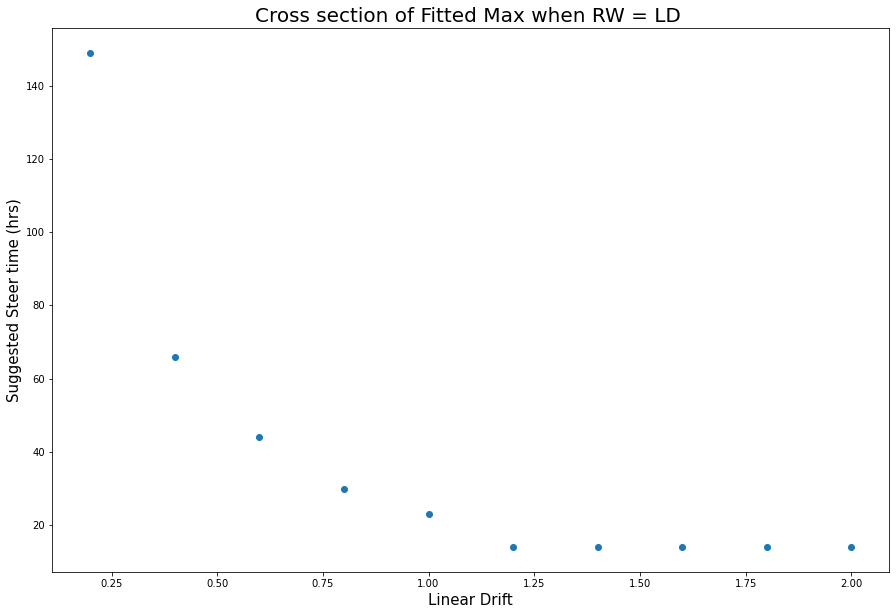

In [30]:
plt.figure(figsize=(15,10))

plt.plot(LD_equal,Fit_Max_equal,'o')

plt.title('Cross section of Fitted Max when RW = LD ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

# Repeat with up to date data - lower LD

In [31]:
save_dir = '/eos/user/e/elsweene/SWAN_projects/Filtered_data_sets/'

In [32]:
Generated_data1 = pd.read_csv(save_dir+"recent_analysis.csv")

Generated_data1['Ld']*-6.036791936445496e-17

0       3.018396e-16
1       2.897660e-16
2       2.776924e-16
3       2.656188e-16
4       2.535453e-16
            ...     
1015   -2.535453e-16
1016   -2.656188e-16
1017   -2.776924e-16
1018   -2.897660e-16
1019   -3.018396e-16
Name: Ld, Length: 1020, dtype: float64

In [33]:
Generated_data2 = Generated_data1.assign(Rescaled_LD=Generated_data1['Ld']*-6.036791936445496e-17)

In [34]:
Generated_data2

,Fit_max,IM_max,Ld,RW,Rescaled_LD
0,87,92,-5.0,0.1,3.018396e-16
1,89,106,-4.8,0.1,2.897660e-16
2,128,92,-4.6,0.1,2.776924e-16
3,93,84,-4.4,0.1,2.656188e-16
4,98,98,-4.2,0.1,2.535453e-16
...,...,...,...,...,...
1015,14,18,4.2,2.0,-2.535453e-16
1016,14,14,4.4,2.0,-2.656188e-16
1017,14,15,4.6,2.0,-2.776924e-16
1018,14,14,4.8,2.0,-2.897660e-16


In [35]:
Generated_data2.to_csv(save_dir + "recent_data_w_rescaled_LD.csv", index=True)

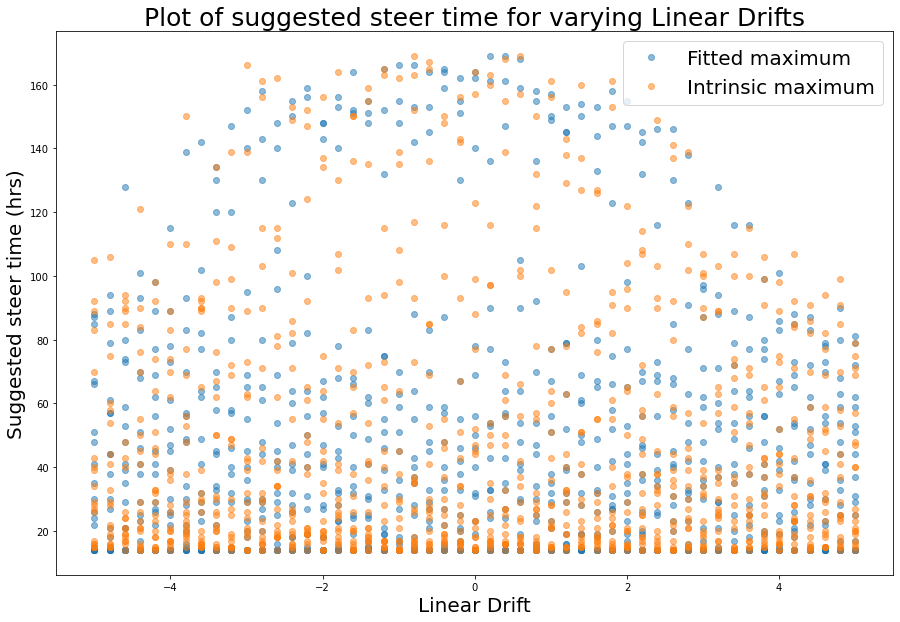

In [36]:
plt.figure(figsize=(15,10))

plt.plot(Generated_data1['Ld'],Generated_data1['Fit_max'],'o',alpha=0.5,label='Fitted maximum')
plt.plot(Generated_data1['Ld'],Generated_data1['IM_max'],'o',alpha=0.5,label='Intrinsic maximum')

plt.xlabel('Linear Drift',fontsize=20)
plt.ylabel('Suggested steer time (hrs)',fontsize=20)

plt.title('Plot of suggested steer time for varying Linear Drifts',fontsize=25)

plt.legend(fontsize=20)

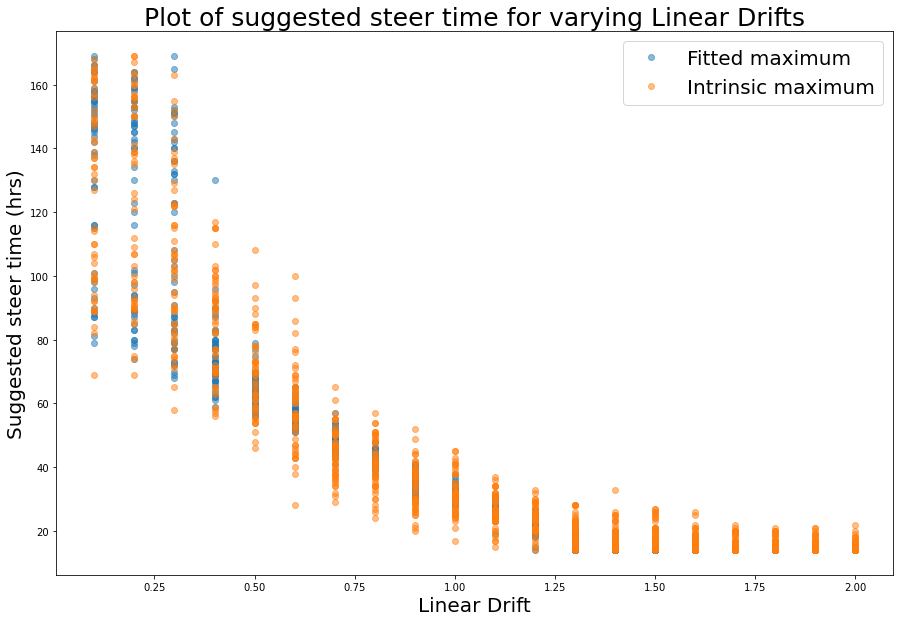

In [37]:
plt.figure(figsize=(15,10))

plt.plot(Generated_data1['RW'],Generated_data1['Fit_max'],'o',alpha=0.5,label='Fitted maximum')
plt.plot(Generated_data1['RW'],Generated_data1['IM_max'],'o',alpha=0.5,label='Intrinsic maximum')

plt.xlabel('Linear Drift',fontsize=20)
plt.ylabel('Suggested steer time (hrs)',fontsize=20)

plt.title('Plot of suggested steer time for varying Linear Drifts',fontsize=25)

plt.legend(fontsize=20)

In [38]:
Z1 = Generated_data1.pivot_table(index='Ld', columns='RW', values='Fit_max').T.values

In [39]:
Y_unique1 = np.sort(Generated_data1.RW.unique())
X_unique1 = np.sort(Generated_data1.Ld.unique())

In [40]:
X1,Y1= np.meshgrid(X_unique1, Y_unique1)

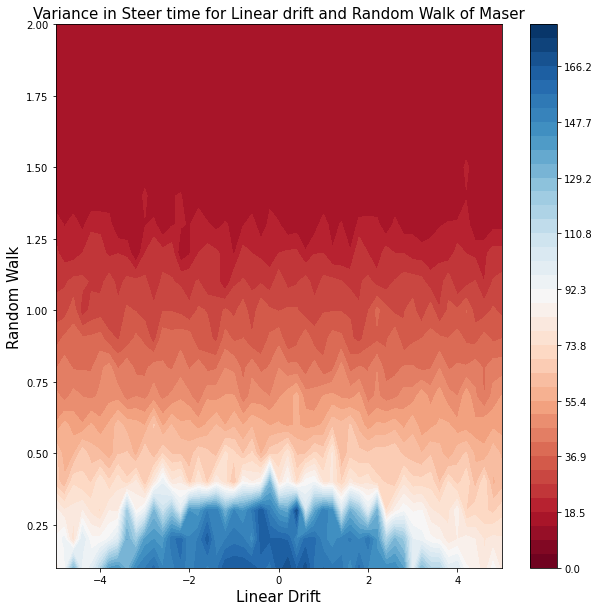

In [41]:
fig, ax1 = plt.subplots(figsize=(10,10))

levels = np.linspace(0,180,40)


mycmap1 = plt.get_cmap('RdBu')
cf1 = ax1.contourf(X1, Y1, Z1,levels, cmap=mycmap1)

line_colors = ['black' for l in cf.levels]


#cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
#ax.clabel(cp, fontsize=10, colors=line_colors)


ax1.set_title('Variance in Steer time for Linear drift and Random Walk of Maser',fontsize=15)
ax1.set_xlabel('Linear Drift',fontsize=15)
ax1.set_ylabel('Random Walk',fontsize=15)

#ax1.set_xlim(-0.01,5)
#ax1.set_ylim(-0.01,1.3)

fig.colorbar(cf1, ax=ax1)
plt.show()

Text(0.061920015991150705, -0.06431478094372152, 'Random Walk')

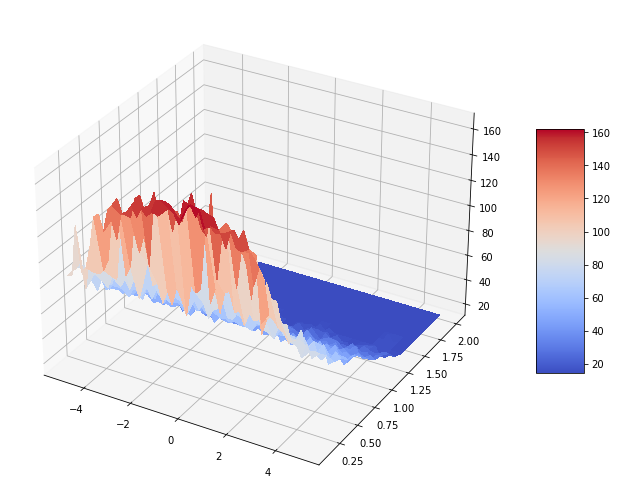

In [42]:
fig = plt.figure(figsize =(14, 9))

my_cmap = plt.get_cmap('coolwarm')

axe1 = plt.axes(projection ='3d')
surf1 = axe1.plot_surface(X1, Y1, Z1,cmap=my_cmap, linewidth=0, antialiased=False)

fig.colorbar(surf1, ax = axe1,
             shrink = 0.5, aspect = 5)
 
axe.set_title('Surface plot RW and LD',fontsize=20)
axe.set_xlabel('Linear Drift',fontsize=15)
axe.set_ylabel('Random Walk',fontsize=15)

# Cross Sections

In [43]:
RW_1utd, LD_for_RW_1utd, Fit_Max_RW_1utd = find_cross_section('RW','Ld',1,Generated_data1)

Text(0, 0.5, 'Suggested Steer time (hrs)')

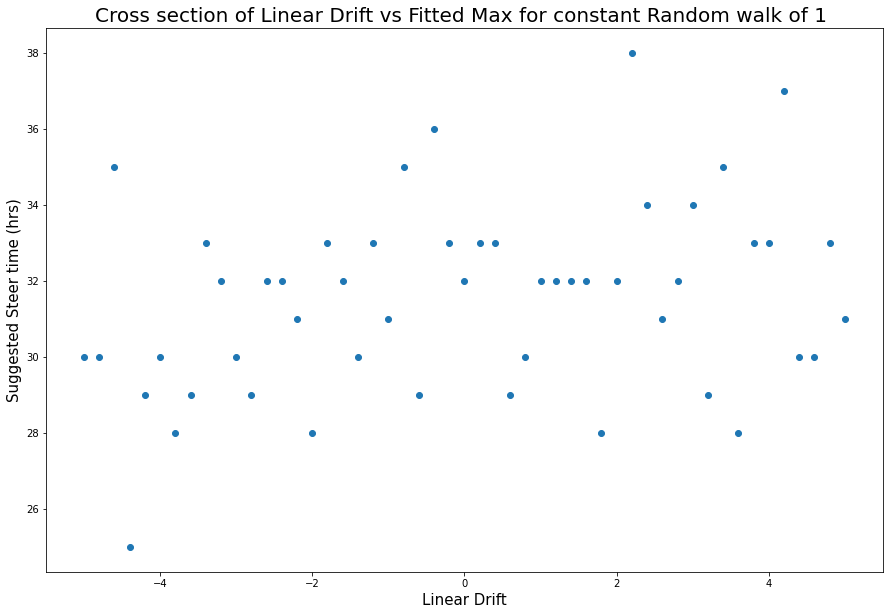

In [44]:
plt.figure(figsize=(15,10))

plt.plot(LD_for_RW_1utd,Fit_Max_RW_1utd,'o')

plt.title('Cross section of Linear Drift vs Fitted Max for constant Random walk of 1 ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

In [45]:
LD_1utd, RW_for_LD_1utd, Fit_Max_LD_1utd = find_cross_section('Ld','RW',1,Generated_data1)

Text(0, 0.5, 'Suggested Steer time (hrs)')

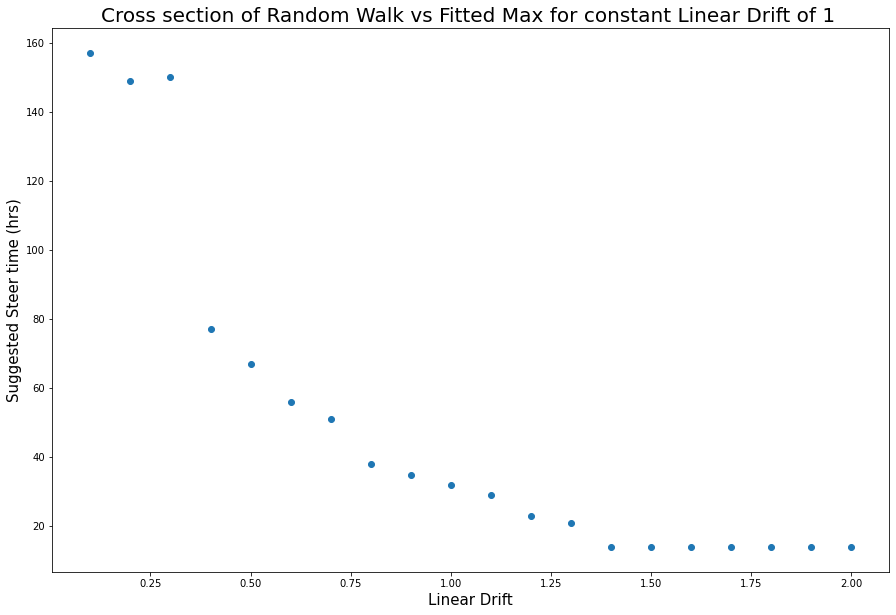

In [46]:
plt.figure(figsize=(15,10))

plt.plot(RW_for_LD_1utd,Fit_Max_LD_1utd,'o')

plt.title('Cross section of Random Walk vs Fitted Max for constant Linear Drift of 1 ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

In [47]:
LD_0utd, RW_for_LD_0utd, Fit_Max_LD_0utd = find_cross_section('Ld','RW',0,Generated_data1)

Text(0, 0.5, 'Suggested Steer time (hrs)')

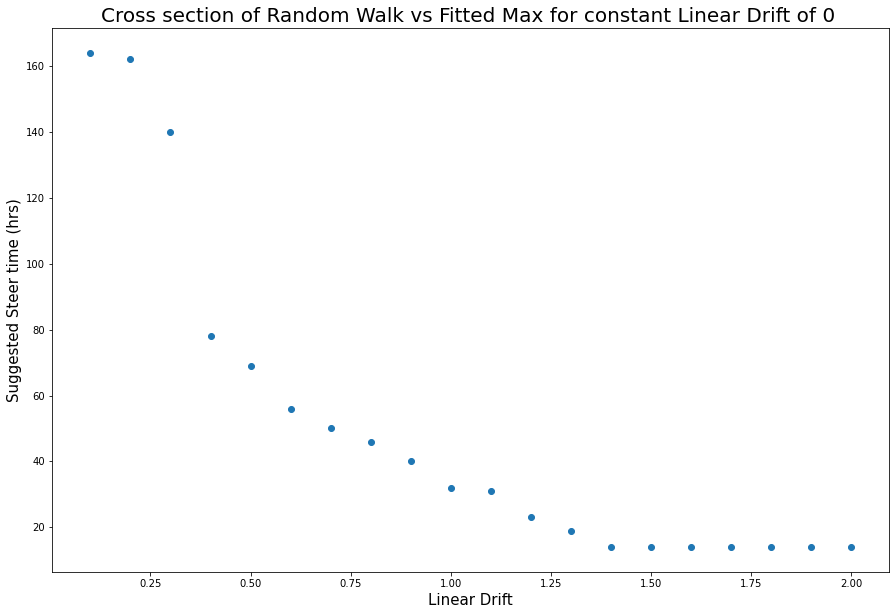

In [48]:
plt.figure(figsize=(15,10))

plt.plot(RW_for_LD_0utd,Fit_Max_LD_0utd,'o')

plt.title('Cross section of Random Walk vs Fitted Max for constant Linear Drift of 0 ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

In [49]:
LD_equalutd, RW_equalutd, Fit_Max_equalutd = find_cross_section1('Ld','RW',Generated_data1)

Text(0, 0.5, 'Suggested Steer time (hrs)')

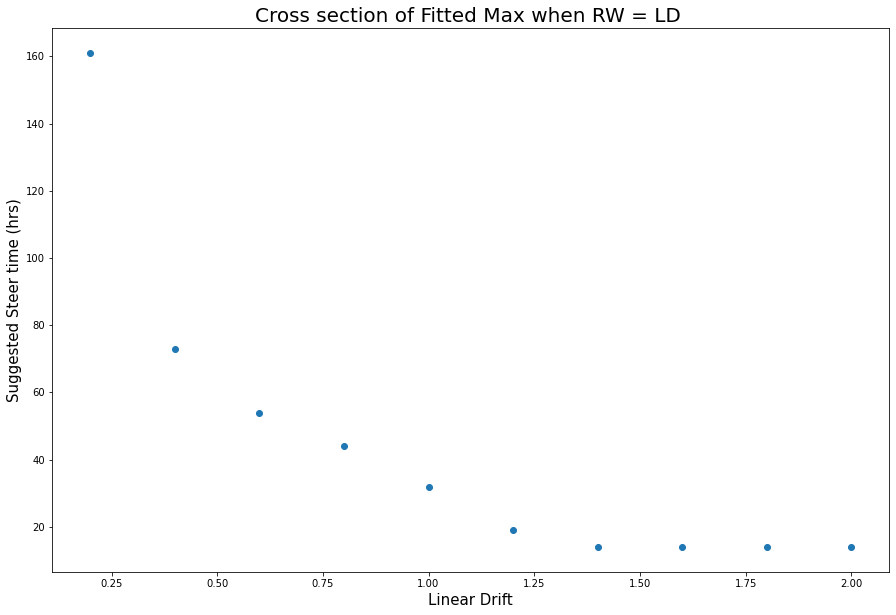

In [50]:
plt.figure(figsize=(15,10))

plt.plot(LD_equalutd,Fit_Max_equalutd,'o')

plt.title('Cross section of Fitted Max when RW = LD ',fontsize=20)
plt.xlabel('Linear Drift',fontsize=15)
plt.ylabel('Suggested Steer time (hrs)',fontsize=15)

# Suggested steer interpolation

In [51]:
def fit_line(x1,y1,x2,y2,x):
    
    slope = (y2-y1)/(x2-x1)
    
    line_at_x = y1 + slope*(x-x1)
    
    return line_at_x

In [72]:
def interpolate_LD(RW,LD):
    
    try:
    
        RW_array,LD_array, Fit_Max_array = find_cross_section('RW','Rescaled_LD',RW ,Generated_data3)

        data = {'Linear Drift': LD_array,
            'Fit max': Fit_Max_array}

        df = pd.DataFrame(data, columns=['Linear Drift', 'Fit max'])

        left_of_point = df[(df['Linear Drift'])<LD]
        right_of_point = df[(df['Linear Drift'])>LD]

        closest_left = min(left_of_point['Linear Drift'], key =lambda x: abs(LD-x))
        closest_right = min(right_of_point['Linear Drift'], key =lambda x: abs(LD-x))

        print(closest_left,closest_right)

        index_left = (left_of_point[left_of_point['Linear Drift']==closest_left].index.values)
        index_right = (right_of_point[right_of_point['Linear Drift']==closest_right].index.values)

        steer_left = left_of_point['Fit max'][int(index_left)]
        steer_right = right_of_point['Fit max'][int(index_right)]

        print(steer_left,steer_right)

        interpolated_fit_max = fit_line(closest_left,steer_left,closest_right,steer_right,LD)

        return round(interpolated_fit_max,5)
    
    except:
        
        RW_array,LD_array, Fit_Max_array = find_cross_section('RW','Rescaled_LD',RW ,Generated_data3)

        data = {'Linear Drift': LD_array,
            'Fit max': Fit_Max_array}

        df = pd.DataFrame(data, columns=['Linear Drift', 'Fit max'])

        left_of_point = df[(df['Linear Drift'])<LD]
        right_of_point = df[(df['Linear Drift'])>LD]
        
        print(left_of_point)

        closest_left = min(left_of_point['Linear Drift'], key =lambda x: abs(LD-x))
        closest_right = min(right_of_point['Linear Drift'], key =lambda x: abs(LD-x))

        print(closest_left,closest_right)

        index_left = (left_of_point[left_of_point['Linear Drift']==closest_left].index.values)
        index_right = (right_of_point[right_of_point['Linear Drift']==closest_right].index.values)

        steer_left = left_of_point['Fit max'][int(index_left)]
        steer_right = right_of_point['Fit max'][int(index_right)]

        print(steer_left,steer_right)

        interpolated_fit_max = fit_line(closest_left,steer_left,closest_right,steer_right,LD)

        return round(interpolated_fit_max,5)

In [73]:
3.75*-6.036791936445496e-17

-2.263796976167061e-16

In [74]:
interpolate_LD(1,0*-6.036791936445496e-17)

-2.4584706505731595e-30 1.1071967505822344e-16
21 24


21.0

In [75]:
interpolate_LD(2,-2.325113e-15)

-2.3251131762227465e-15 -2.2143935011645203e-15
14 14


14.0

In [76]:
### OLD suggested steer time function without interpolation


# def find_steer_time():

#     suggest_steer_box.delete(0, END)
#     entry_fit_to_Y_days_box.delete(0,END)


#     RW = entry_RW_int.get()
#     LD = entry_LD_int.get()
    
#     for i in np.arange(0,1020,1): 
                       
#             x = round(Generated_data1['RW'][i],2)
                       
#             if x == RW:
#                 y = round(Generated_data1['Ld'][i],2)
                
#                 if y == LD :
                    
#                     time = Generated_data1['Fit_max'][i]
#                     suggest_steer_box.insert(0,time)
#                     entry_fit_to_Y_days_box.insert(0,round(float(suggest_steer_box.get())/24,4))

#                 elif y !=LD:
#                     i+=1
                        
#             elif x !=RW:
#                 i+=1

# Combine two analyses

In [77]:
Generated_data

,Fit_max,IM_max,Ld,RW
0,16,19,-5.0,0.1
1,19,22,-4.8,0.1
2,18,21,-4.6,0.1
3,21,21,-4.4,0.1
4,21,23,-4.2,0.1
...,...,...,...,...
1015,14,14,4.2,2.0
1016,14,15,4.4,2.0
1017,14,14,4.6,2.0
1018,14,14,4.8,2.0


In [78]:
Generated_data2

,Fit_max,IM_max,Ld,RW,Rescaled_LD
0,87,92,-5.0,0.1,3.018396e-16
1,89,106,-4.8,0.1,2.897660e-16
2,128,92,-4.6,0.1,2.776924e-16
3,93,84,-4.4,0.1,2.656188e-16
4,98,98,-4.2,0.1,2.535453e-16
...,...,...,...,...,...
1015,14,18,4.2,2.0,-2.535453e-16
1016,14,14,4.4,2.0,-2.656188e-16
1017,14,15,4.6,2.0,-2.776924e-16
1018,14,14,4.8,2.0,-2.897660e-16


In [79]:
Generated_data3 = Generated_data.assign(Rescaled_LD=Generated_data['Ld']*-5.535983752911291e-16)

In [80]:
Generated_data3

,Fit_max,IM_max,Ld,RW,Rescaled_LD
0,16,19,-5.0,0.1,2.767992e-15
1,19,22,-4.8,0.1,2.657272e-15
2,18,21,-4.6,0.1,2.546553e-15
3,21,21,-4.4,0.1,2.435833e-15
4,21,23,-4.2,0.1,2.325113e-15
...,...,...,...,...,...
1015,14,14,4.2,2.0,-2.325113e-15
1016,14,15,4.4,2.0,-2.435833e-15
1017,14,14,4.6,2.0,-2.546553e-15
1018,14,14,4.8,2.0,-2.657272e-15


In [81]:
Generated_data4 = pd.concat([Generated_data2,Generated_data3],ignore_index=True)

In [82]:
Generated_data4

,Fit_max,IM_max,Ld,RW,Rescaled_LD
0,87,92,-5.0,0.1,3.018396e-16
1,89,106,-4.8,0.1,2.897660e-16
2,128,92,-4.6,0.1,2.776924e-16
3,93,84,-4.4,0.1,2.656188e-16
4,98,98,-4.2,0.1,2.535453e-16
...,...,...,...,...,...
2035,14,14,4.2,2.0,-2.325113e-15
2036,14,15,4.4,2.0,-2.435833e-15
2037,14,14,4.6,2.0,-2.546553e-15
2038,14,14,4.8,2.0,-2.657272e-15


In [83]:
interpolate_LD(1.5,6*2.776924e-16)

1.6607951258733863e-15 1.7715148009316122e-15
14 14


14.0

In [ ]:
Generated_data3.to_csv(save_dir + "recent_data_w_rescaled_old_LD.csv", index=True)

In [ ]:
-5.535983752911291e-16*5